## 🧩 Final Preprocessing Step: ROI Extraction for YOLO Training

After analyzing the most common grayscale level across our dataset, we generated **Region of Interest (ROI) images** based on the bounding box annotations. This preprocessing step is **critical for YOLO-based models**, as it ensures the model focuses solely on the text regions, improving its ability to **localize words accurately**.

By isolating only the relevant regions and maintaining a consistent grayscale background, we reduce noise and enhance the quality of the training data.

This marks the **final step before training our YOLOv8n model**, and we expect this careful preparation to have a significant impact on the model’s performance. We'll evaluate the results and effectiveness of this step during the training and validation phases.


In [ ]:
import os

label_dir = ""

# List all files in the directory
label_files = os.listdir(label_dir)

# Display the list of label files
label_files


['IMG_1617.txt',
 'IMG_1618.txt',
 'IMG_1619.txt',
 'IMG_1620.txt',
 'IMG_1621.txt',
 'IMG_1622.txt',
 'IMG_1623.txt',
 'IMG_1624.txt',
 'IMG_1625.txt',
 'IMG_1626.txt',
 'IMG_1627.txt',
 'IMG_1628.txt',
 'IMG_1629.txt',
 'IMG_1630.txt',
 'IMG_1631.txt',
 'IMG_1632.txt',
 'IMG_1633.txt',
 'IMG_1634.txt',
 'IMG_1635.txt',
 'IMG_1636.txt',
 'IMG_1637.txt',
 'IMG_1638.txt',
 'IMG_1639.txt',
 'IMG_1640.txt',
 'IMG_1641.txt',
 'IMG_1642.txt',
 'IMG_1643.txt',
 'IMG_1644.txt',
 'IMG_1645.txt',
 'IMG_1646.txt',
 'IMG_1647.txt',
 'IMG_1648.txt',
 'IMG_1649.txt',
 'IMG_1650.txt',
 'IMG_1651.txt',
 'IMG_1652.txt',
 'IMG_1653.txt',
 'IMG_1654.txt',
 'IMG_1655.txt',
 'IMG_1656.txt',
 'IMG_1657.txt',
 'IMG_1658.txt',
 'IMG_1659.txt',
 'IMG_1660.txt',
 'IMG_1661.txt',
 'IMG_1662.txt',
 'IMG_1663.txt',
 'IMG_1664.txt',
 'IMG_1665.txt',
 'IMG_1666.txt',
 'IMG_1667.txt',
 'IMG_1668.txt',
 'IMG_1669.txt',
 'IMG_1670.txt',
 'IMG_1671.txt',
 'IMG_1672.txt',
 'IMG_1673.txt',
 'IMG_1674.txt',
 'IMG_1675.txt

In [2]:
# Extract image names without extensions as dictionary keys
image_names = [os.path.splitext(filename)[0] for filename in label_files]

# Display the list of image names
image_names


['IMG_1617',
 'IMG_1618',
 'IMG_1619',
 'IMG_1620',
 'IMG_1621',
 'IMG_1622',
 'IMG_1623',
 'IMG_1624',
 'IMG_1625',
 'IMG_1626',
 'IMG_1627',
 'IMG_1628',
 'IMG_1629',
 'IMG_1630',
 'IMG_1631',
 'IMG_1632',
 'IMG_1633',
 'IMG_1634',
 'IMG_1635',
 'IMG_1636',
 'IMG_1637',
 'IMG_1638',
 'IMG_1639',
 'IMG_1640',
 'IMG_1641',
 'IMG_1642',
 'IMG_1643',
 'IMG_1644',
 'IMG_1645',
 'IMG_1646',
 'IMG_1647',
 'IMG_1648',
 'IMG_1649',
 'IMG_1650',
 'IMG_1651',
 'IMG_1652',
 'IMG_1653',
 'IMG_1654',
 'IMG_1655',
 'IMG_1656',
 'IMG_1657',
 'IMG_1658',
 'IMG_1659',
 'IMG_1660',
 'IMG_1661',
 'IMG_1662',
 'IMG_1663',
 'IMG_1664',
 'IMG_1665',
 'IMG_1666',
 'IMG_1667',
 'IMG_1668',
 'IMG_1669',
 'IMG_1670',
 'IMG_1671',
 'IMG_1672',
 'IMG_1673',
 'IMG_1674',
 'IMG_1675',
 'IMG_1676',
 'IMG_1677',
 'IMG_1678',
 'IMG_1679',
 'IMG_1680',
 'IMG_1681',
 'IMG_1682',
 'IMG_1683',
 'IMG_1685',
 'IMG_1686',
 'IMG_1687',
 'IMG_1688',
 'IMG_1689',
 'IMG_1690',
 'IMG_1691',
 'IMG_1692',
 'IMG_1693',
 'IMG_1694',

In [3]:
# Initialize the dictionary
image_bounding_boxes = {}

# Iterate through label files
for filename, image_name in zip(label_files, image_names):
    # Read bounding box coordinates from label file
    label_path = os.path.join(label_dir, filename)
    with open(label_path, "r") as label_file:
        # Extract and format bounding box coordinates
        bounding_boxes = [tuple(map(float, line.strip().split()[1:])) for line in label_file]

    # Associate bounding box coordinates with image filename
    image_bounding_boxes[image_name] = bounding_boxes

# Display the dictionary with image names and associated bounding box coordinates
image_bounding_boxes


{'IMG_1617': [(0.22705, 0.066691, 0.30754, 0.029315),
  (0.684835, 0.062693, 0.131554, 0.021334),
  (0.123057, 0.13736, 0.081776, 0.021332),
  (0.20128, 0.17136, 0.238221, 0.022666),
  (0.140837, 0.212693, 0.106667, 0.025332),
  (0.722168, 0.200693, 0.03911, 0.027999),
  (0.613724, 0.164028, 0.142222, 0.026667),
  (0.597725, 0.128027, 0.113776, 0.029333),
  (0.211946, 0.286027, 0.078224, 0.022669),
  (0.634168, 0.278693, 0.392887, 0.026667),
  (0.23328, 0.326694, 0.202665, 0.04),
  (0.488391, 0.342693, 0.197331, 0.074668),
  (0.667946, 0.326027, 0.108446, 0.041334),
  (0.374613, 0.40736, 0.186667, 0.044),
  (0.616391, 0.446693, 0.197331, 0.064),
  (0.837725, 0.450693, 0.220443, 0.098668),
  (0.335503, 0.580693, 0.115556, 0.107999),
  (0.651063, 0.553361, 0.469322, 0.053333),
  (0.626172, 0.608027, 0.287993, 0.061332),
  (0.570169, 0.750026, 0.218664, 0.102666),
  (0.835053, 0.734027, 0.24709, 0.078668),
  (0.543502, 0.84136, 0.129775, 0.064),
  (0.724836, 0.831359, 0.172444, 0.073333),

In [ ]:
import cv2
import numpy as np
# Path to the directory containing the images
image_dir = ""



In [ ]:
# Iterate over each image filename in the image_bounding_boxes dictionary
for image_filename, bounding_boxes in image_bounding_boxes.items():
    # Load the original image
    original_image = cv2.imread(os.path.join(image_dir, image_filename + '.jpg'))
    print(image_filename)

    # Get the height and width of the original image
    height, width, _ = original_image.shape
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Create a blank canvas filled with white pixels
    processed_image = 190 * np.ones_like(gray_image, dtype=np.uint8)

    # Iterate over bounding box coordinates for the current image
    for bbox in bounding_boxes:
        # Extract bounding box coordinates
        x_center_norm, y_center_norm, width_norm, height_norm = bbox

        # Convert normalized coordinates to pixel coordinates
        x_center = int(x_center_norm * width)
        y_center = int(y_center_norm * height)
        width_pixels = int(width_norm * width)
        height_pixels = int(height_norm * height)

        # Calculate bounding box coordinates
        x1 = max(0, x_center - width_pixels // 2)
        y1 = max(0, y_center - height_pixels // 2)
        x2 = min(width, x_center + width_pixels // 2)
        y2 = min(height, y_center + height_pixels // 2)

        # Copy text regions from original image to processed image
        processed_image[y1:y2, x1:x2] = gray_image[y1:y2, x1:x2]

    # Save the processed image
    cv2.imwrite(f'{image_filename}.jpg', processed_image)


IMG_1617
IMG_1618
IMG_1619
IMG_1620
IMG_1621
IMG_1622
IMG_1623
IMG_1624
IMG_1625
IMG_1626
IMG_1627
IMG_1628
IMG_1629
IMG_1630
IMG_1631
IMG_1632
IMG_1633
IMG_1634
IMG_1635
IMG_1636
IMG_1637
IMG_1638
IMG_1639
IMG_1640
IMG_1641
IMG_1642
IMG_1643
IMG_1644
IMG_1645
IMG_1646
IMG_1647
IMG_1648
IMG_1649
IMG_1650
IMG_1651
IMG_1652
IMG_1653
IMG_1654
IMG_1655
IMG_1656
IMG_1657
IMG_1658
IMG_1659
IMG_1660
IMG_1661
IMG_1662
IMG_1663
IMG_1664
IMG_1665
IMG_1666
IMG_1667
IMG_1668
IMG_1669
IMG_1670
IMG_1671
IMG_1672
IMG_1673
IMG_1674
IMG_1675
IMG_1676
IMG_1677
IMG_1678
IMG_1679
IMG_1680
IMG_1681
IMG_1682
IMG_1683
IMG_1685
IMG_1686
IMG_1687
IMG_1688
IMG_1689
IMG_1690
IMG_1691
IMG_1692
IMG_1693
IMG_1694
IMG_1696
IMG_1697
IMG_1698
IMG_1699
IMG_1700
IMG_1701
IMG_1702
IMG_1703
IMG_1704
IMG_1705
IMG_1706
IMG_1707
IMG_1708
IMG_1709
IMG_1710
IMG_1711
IMG_1712
IMG_1713
IMG_1714
IMG_1715
IMG_1716
IMG_1717
IMG_1718
IMG_1719
IMG_1720
IMG_1721
IMG_1722
IMG_1723
IMG_1724
IMG_1725
IMG_1726
IMG_1727
IMG_1728
IMG_1729
I

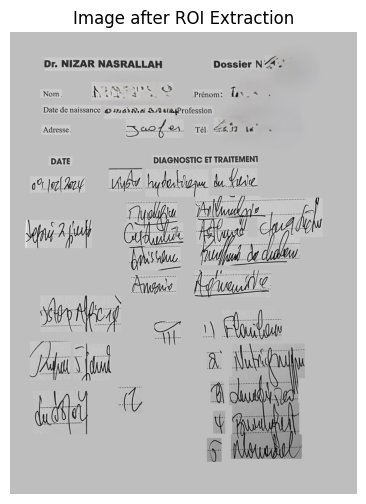

In [ ]:
import matplotlib.pyplot as plt
# Path to the image file
roi_img = cv2.imread("C:\\Users\\Mega-PC\\Desktop\\IMG_1520.jpg")
# Plot the roi image with bounding box
plt.figure(figsize=(8, 6))
plt.imshow(roi_img, cmap='gray')
plt.title('Image after ROI Extraction')
plt.axis('off')
plt.show()